# 10 Advanced: liste, argumenti komandne linije

## 10.1 Podsetnik

- Problemi sa domacim?

- Pogledati **9_operacije_sa_listama_i_stringovima_strukture_podataka.ipynb**

## 10.2 Slice objekti

- Iz liste je cesto potrebno izdvojiti samo neke elemente

- Kao sto smo videli, to se postize slajsovanjem

- U Python-u postoje genericki **slice** objekti koji se mogu prosledjivati raznim strukturama podataka (listama, tuplovima, stringovima, bajtovima i range objektu) tako da se iz njih izdvoje/slajsuju neki elementi

In [14]:
s = 'Python'

slajs = slice(0, 3, 1)  # Od indeksa 0 do 3, step=1

print(s[slajs])
print(s[0:3:1])

print(type(slajs))

Pyt
Pyt
<class 'slice'>


- S obzirom da je operacija slajsovanja vec podrzana u listama sa prirodnijom sintaksom, mi fakticki nikad necemo koristit **slice** objekte za te potrebe

In [ ]:
print(s[0:3:1]) # Laksi zapis, bespotrebno se komplikuje slajs objektom

Pyt


In [16]:
l = list(range(10))     # Niz brojeva od 0 do 9 u vidu liste
print(l)
print()

l[4:7] = [1, 2, 3]      # Ovaj slajs je referenca na deo liste u memoriji, direktno radi sa listom
print(l)
print()

del l[4:7]  # del je operator potpunog oslobadjanja zauzete memorije od strane prosledjenog objekta
print(l)
print()

print(type(l[1:3]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[0, 1, 2, 3, 1, 2, 3, 7, 8, 9]

[0, 1, 2, 3, 7, 8, 9]

<class 'list'>


## 10.3 Common pitfall: Lista kao opcionalan parametar funkcije

- U Python-u, default argumenti funkcije se evaluiraju jednom - kada se funkcija definise, ne svaki put kad se funkcija pozove (sto nije slucaj u nekim jezicima)

- Ovo izaziva neocekivane efekte kada se kao default argument koriste neprimitivni (mutable) tipovi (lista, tuple, dict)

In [ ]:
def append_to(element, lista=[]):
    lista.append(element)
    return lista

# Ono sto ocekujemo je da se svaki put kreira nova prazna lista
# i da svaki put kad pozovemo fju i prosledimo element, fja vrati
# listu ciji je jedini clan taj element, tj.
#
# lista1 = append_to(3)
# # lista1 je [3]
# lista2 = append_to(5)
# # lista2 je [5]
#
# Medjutim

lista1 = append_to(3)
print(lista1)

lista2 = append_to(5)
print(lista2)

[3]
[3, 5]


- Kada zelimo da postignemo efekat koji smo planirali da imamo tako sto smo default vrednost liste stavili na praznu listu (ili ako koristimo bilo koji mutable objekat), najbolje je to uraditi ovako:

In [ ]:
def append_to(element, lista=None):
    if lista is None:
        lista = []
    lista.append(element)
    return lista

lista1 = append_to(3)
print(lista1)

lista2 = append_to(5)
print(lista2)

[3]
[5]


## 10.4 Visedimenzionalni nizovi

- Ponekad jednodimenzionalnost liste nije dovoljna da se plasticno predstave neki objekti

- U algebri, fizici i ML-u vrlo cesto se barata sa visedimenzionalnim nizovima

- Python nativno podrzava prosirenje liste na bilo koji broj dimenzija, koji rad u vise dimenzija znacajno olaksava

In [25]:
mat = [ [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9] ]   # Ovo je prosto niz nizova, vrlo prirodno

print(len(mat)) # Sto se objekta mat tice, on vidi da ima samo tri elementa
                # to sto su njegovi elementi liste za njega nije nista posebno

# Sada je lako indeksirati bilo koji clan sasvim prirodno, identicno kao u matematici -1
print(mat[0][1])    # nulti red, prva kolona

mat[0][1] = 5

for row in mat: # Lepsi ispis
    print(row)

print()

# Medjutim, pazite se (mada nisam siguran da li ce vam zatrebati)
mat = [[1, 2, 3]]*3
for row in mat:
    print(row)
    
print(id(mat[0]) == id(mat[1]))     # Samo je umnozio reference na isti objekat!

mat[0][1] = 10

for row in mat:
    print(row)

m = 3
n = 3
for i in range(m):
    for j in range(n):
        print(mat[i][j])

3
2
[1, 5, 3]
[4, 5, 6]
[7, 8, 9]

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
True
[1, 10, 3]
[1, 10, 3]
[1, 10, 3]
1
10
3
1
10
3
1
10
3


- Nama ce eventualno trebati matrice, a za rad sa visedimenzionalnim nizovima najcesce se koristi **numpy** https://numpy.org/

## 10.5 Argumenti komandne linije

- Svako kuckanje programa u nekom IDE-u ili u Colab-u je da bi se razradio neki algoritam

- Posto je Python scripting jezik, tj. planski je pravljen da se neki manji posao brzo automatizuje i iskuca, a moguce je to i sa velikim programima, cesto je to i dovoljno

- Medjutim, mnoge programe potrebno je pokrenuti direktno iz OS-a 

- U tom slucaju se Python skripta otkuca komplet u .py fajlu (ili u nekoliko njih, medjusobno povezanih, ako je program veliki) i onda se poziva Python interpreter da tu skriptu pokrene

- Ako je program pisan da ima GUI - izaci ce prozor za interakciju. Ako ne, interakcija sa korisnikom vrsi se preko CMD-a

- Prisetiti se da je Python interpretiran jezik i da je stoga potrebno da u sistemu postoje i source kod programa i Python interpreter kako bi se program pokrenuo (sto nije slucaj sa kompajliranim jezicima, koji kada se jednom iskompajliraju za odredjenu platformu, recimo .exe za Windows, nativno se mogu pokrenuti na toj platformi)

- Sav nas rad bice u Colab-u, ali nije zgoreg znati kako se koristi i CMD


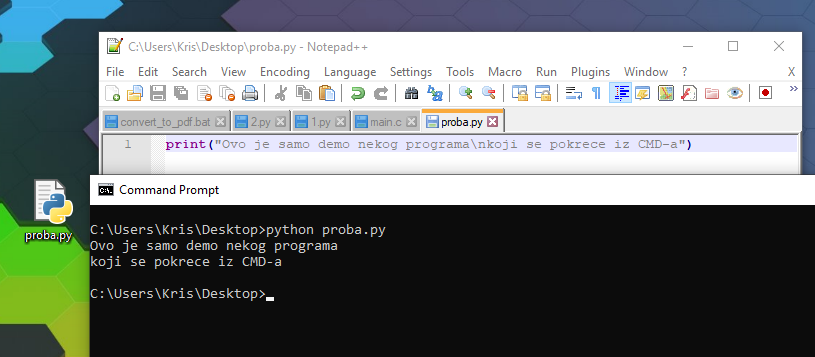

- Prosto: CMD je pozicioniran tamo gde je program, pozvan je Python interpreter koji je CMD-u vidljiv direktno (i to zato sto je putanja do njega dodata u sistemski PATH), i njemu je prosledjen program koji treba da pokrene

- Cesto se desava da pri pokretanju programa treba proslediti i neke argumente programu, i taj nacin vrlo cesto predstavlja jedinu (potrebnu) komunikaciju izmedju korisnika i programa



### Zadatak

- Zamislite da ste bili na odmoru u Parizu i slikali Ajfelov toranj iz nekoliko uglova telefonom

- Iz nekog razloga, cesto se desava da slike nisu pravilno rotirane, i to zna da bude frustrirajuce

- Zamislite da su sve slike rotirane udesno. Ima ih brdo i ne zelite rucno da se zamarate da ih rotirate. Naravno, resicete to za 2 min koristeci Google i Python

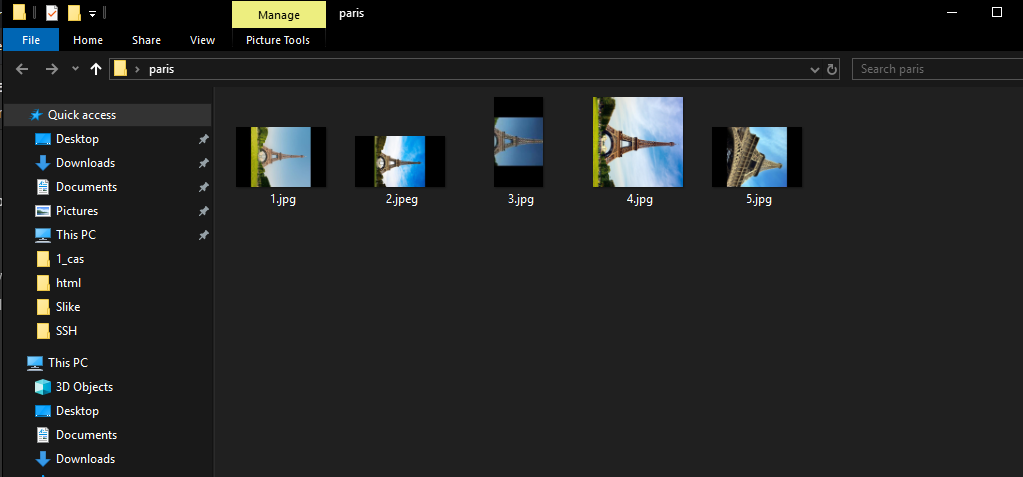

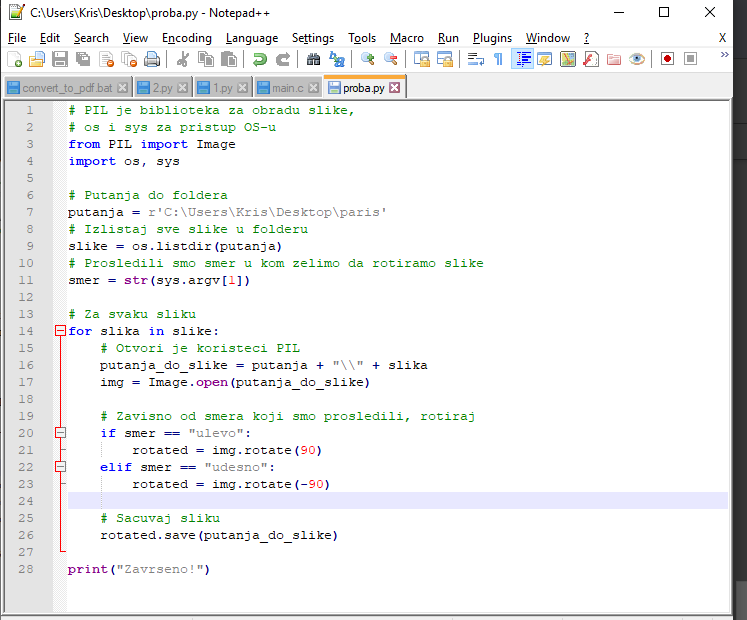

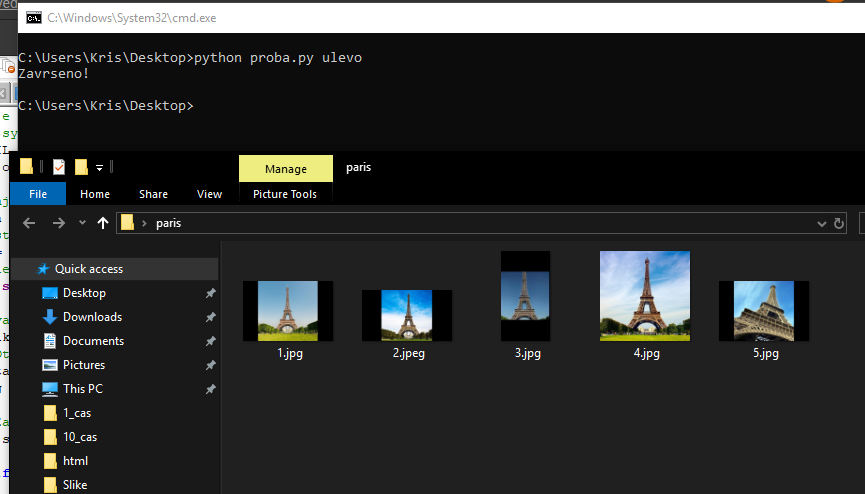

- **sys.argv** je lista argumenata prosledjenih interpreteru

- U ovom slucaju **sys.argv[0]** je "proba.py", a **sys.argv[1]** je "ulevo"

## 10.6 Domaci

1. Napisati program koji učitava i zatim ispisuje elemente učitane matrice. Kao argumenti komandne linije učitavaju se dva cela broja m i n (tim redosledom), a potom i elementi matrice celih brojeva dimenzije m × n. Pretpostaviti da je
maksimalna dimenzija matrice 5x5, u slučaju neispravnog unosa ispisati odgovarajuću poruku o grešci. 
\
Pri ispisu matrice, probajte da koristite '\t' karakter. Izguglajte kako koristiti Tab karakter za poravnjanje.

**Odavde pa nadalje sve radite u Colab-u.**

2. Napisati program koji za učitanu celobrojnu matricu dimenzije m × n izračunava i štampa na tri decimale
njenu euklidsku normu. Pretpostaviti da je maksimalna dimenzija matrice 5×5. U slučaju neispravnog unosa, ispisati odgovarajuću poruku o grešci. 
\
Uputstvo: Euklidska norma matrice je kvadratni koren sume kvadrata svih elemenata matrice.

3. Napisati program koji za učitan celobrojnu kvadratnu matricu, ispituje da li su njeni elementi po kolonama, vrstama i dijagonalama (glavnoj i sporednoj) sortirani strogo rastuće. Pretpostaviti da je maksimalna dimenzija matrice 5 × 5, u slučaju neispravnog unosa ispisati odgovarajuću poruku o grešci.

4. Napisati program koji predstavlja simulaciju igre “vešala”. Kao argumenti učitavaju se reč i maksimalan broj pokušaja. Nakon toga korisnik pogađa slova, ukoliko potroši maksimalan broj pokušaja izgubio je igru, ako pogodi pre nego što je iskoristio maksimalan broj pokušaja dobio je igru. Ispisati
poruku o ishodu igre.

---
2. Napisati program koji za učitanu celobrojnu matricu dimenzije m × n izračunava i štampa na tri decimale njenu euklidsku normu. Pretpostaviti da je maksimalna dimenzija matrice 5×5. U slučaju neispravnog unosa, ispisati odgovarajuću poruku o grešci.
Uputstvo: Euklidska norma matrice je kvadratni koren sume kvadrata svih elemenata matrice.

In [32]:
import math

# unos matrice
m = int(input("Unesi m "))
n = int(input("Unesi n "))

mat = []

for i in range(m):
    red = []
    for j in range(n):
        zbir += int(input(f"Unesi element na poziciji [{i+1}, {j+1}] "))
    mat.append(red)

# trazenje euklidske norme
zbir = 0
for i in range(m):
    for j in range(n):
        zbir = zbir + mat[i][j]**2

print("Euklidska norma je ", math.sqrt(zbir))

Unesi m 2
Unesi n 2
Unesi element na poziciji [1, 1] 1
Unesi element na poziciji [1, 2] 2
Unesi element na poziciji [2, 1] 3
Unesi element na poziciji [2, 2] 4
Euklidska norma je  5.477225575051661
